# Chapter 5: Confidence intervals

### Confidence interval of population proportion

#### Example

Sample proportion: 0.60
95% Confidence Interval: (0.53, 0.67)


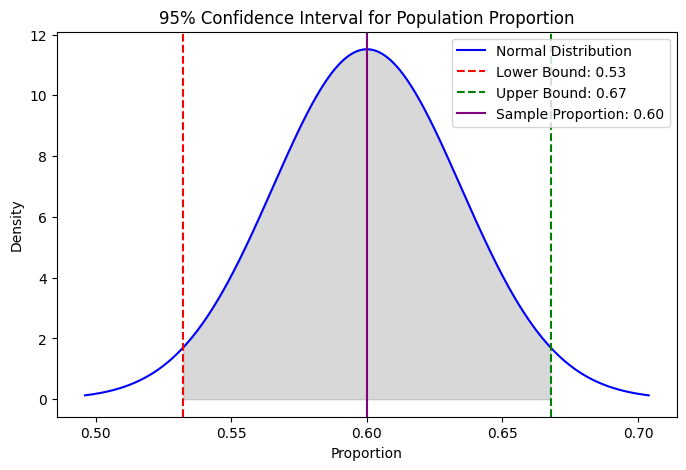

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given values
n = 200
p_hat = 120 / n
z_star = 1.96  # 95% confidence level

# Standard error calculation
se = np.sqrt((p_hat * (1 - p_hat)) / n)

# Confidence interval calculation
margin_of_error = z_star * se
ci_lower = p_hat - margin_of_error
ci_upper = p_hat + margin_of_error

print(f"Sample proportion: {p_hat:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

# Visualization setup
x = np.linspace(p_hat - 3*se, p_hat + 3*se, 1000)
y = norm.pdf(x, p_hat, se)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Normal Distribution', color='blue')
plt.axvline(ci_lower, color='red', linestyle='--', label=f'Lower Bound: {ci_lower:.2f}')
plt.axvline(ci_upper, color='green', linestyle='--', label=f'Upper Bound: {ci_upper:.2f}')
plt.axvline(p_hat, color='purple', linestyle='-', label=f'Sample Proportion: {p_hat:.2f}')
plt.fill_between(x, y, where=(x >= ci_lower) & (x <= ci_upper), color='gray', alpha=0.3)

plt.title('95% Confidence Interval for Population Proportion')
plt.xlabel('Proportion')
plt.ylabel('Density')
plt.legend()
plt.show()


### Confidence interval of population mean
#### Example 1

In [3]:
import numpy as np
import scipy.stats as stats

# Given values
sample_mean = 68
sample_std = 4
sample_size = 40
confidence_level = 0.95

# Calculate z-score
z_score = stats.norm.ppf((1 + confidence_level) / 2)

# Calculate Margin of Error
margin_of_error = z_score * (sample_std / np.sqrt(sample_size))

# Results
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"Margin of Error: {margin_of_error:.3f}")
print(f"Confidence Interval: [{lower_bound:.3f}, {upper_bound:.3f}]")

Margin of Error: 1.240
Confidence Interval: [66.760, 69.240]


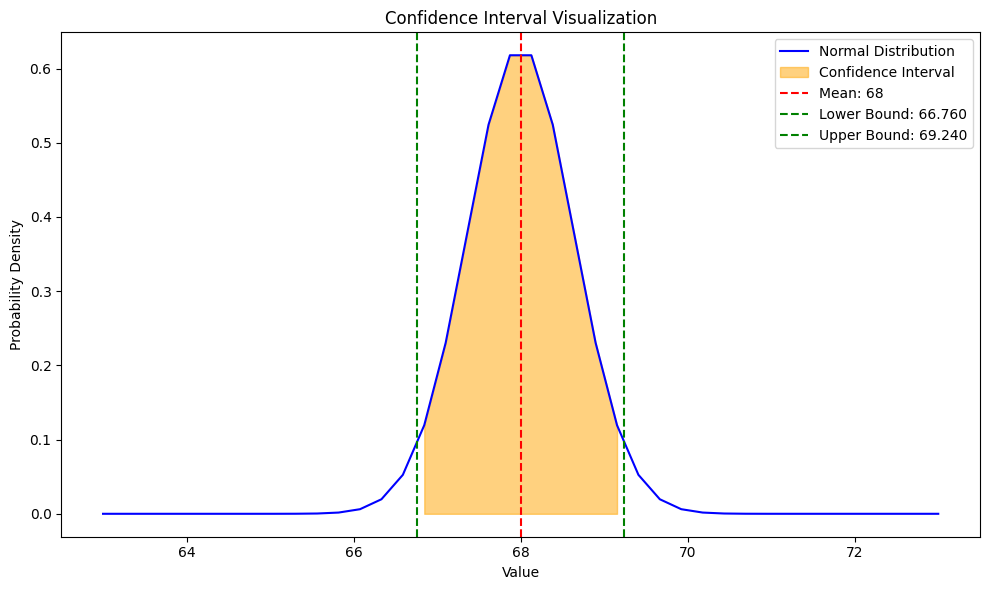

In [4]:
# Visualization
x = np.linspace(sample_mean - 5, sample_mean + 5, sample_size)  # Generate x values for the normal curve
y = stats.norm.pdf(x, loc=sample_mean, scale=sample_std / np.sqrt(sample_size))  # Normal PDF for sample mean distribution

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the normal distribution curve
plt.plot(x, y, label='Normal Distribution', color='blue')

# Shade the area representing the confidence interval
plt.fill_between(x, y, where=(x >= lower_bound) & (x <= upper_bound), color='orange', alpha=0.5, label='Confidence Interval')

# Mark the mean and confidence interval bounds
plt.axvline(sample_mean, color='red', linestyle='--', label=f'Mean: {sample_mean}')
plt.axvline(lower_bound, color='green', linestyle='--', label=f'Lower Bound: {lower_bound:.3f}')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound: {upper_bound:.3f}')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Confidence Interval Visualization')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#### Example 2

In [5]:
new_sample_size = 400
new_margin_of_error = z_score * (sample_std / np.sqrt(new_sample_size))
new_lower_bound = sample_mean - new_margin_of_error
new_upper_bound = sample_mean + new_margin_of_error
print(f"New Margin of Error: {new_margin_of_error:.3f}")
print(f"New Confidence Interval: [{new_lower_bound:.3f}, {new_upper_bound:.3f}]")

New Margin of Error: 0.392
New Confidence Interval: [67.608, 68.392]


In [7]:
x = np.linspace(sample_mean - 5, sample_mean + 5, new_sample_size)  
y = stats.norm.pdf(x, loc=sample_mean, scale=sample_std / np.sqrt(sample_size))  

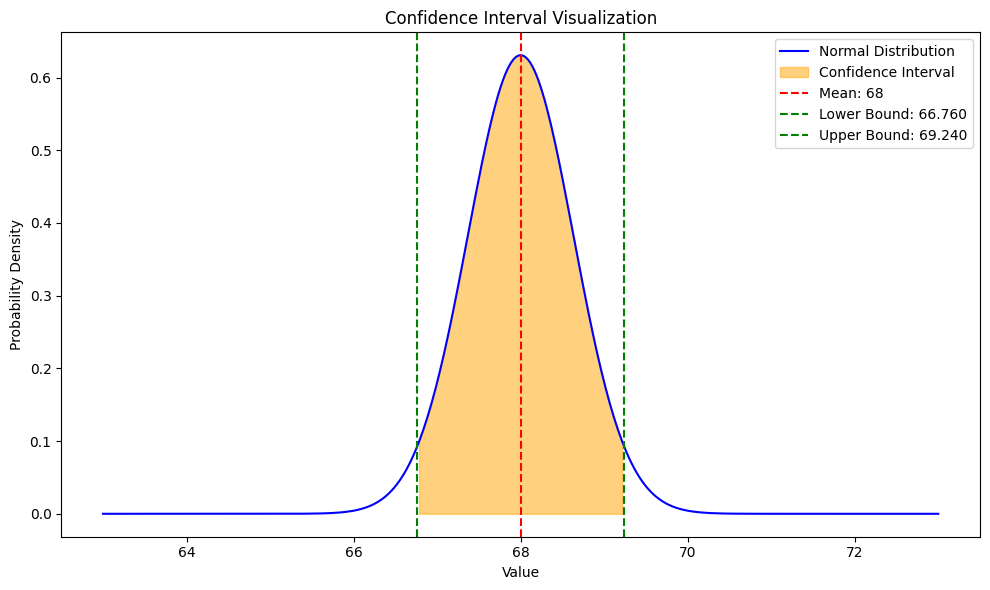

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution', color='blue')
plt.fill_between(x, y, where=(x >= lower_bound) & (x <= upper_bound), color='orange', alpha=0.5, label='Confidence Interval')
plt.axvline(sample_mean, color='red', linestyle='--', label=f'Mean: {sample_mean}')
plt.axvline(lower_bound, color='green', linestyle='--', label=f'Lower Bound: {lower_bound:.3f}')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound: {upper_bound:.3f}')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Confidence Interval Visualization')
plt.legend()
plt.tight_layout()
plt.show()

## Z-Score

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=40) 

In [10]:
mean = np.mean(data)
std_dev = np.std(data, ddof=1)
z_scores = (data - mean) / std_dev

In [11]:
print("The generated data:", data.round(1))
print("The Z-scores:", z_scores.round(1))
x_values = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)
y_values = norm.pdf(x_values, mean, std_dev)

The generated data: [55.  48.6 56.5 65.2 47.7 47.7 65.8 57.7 45.3 55.4 45.4 45.3 52.4 30.9
 32.8 44.4 39.9 53.1 40.9 35.9 64.7 47.7 50.7 35.8 44.6 51.1 38.5 53.8
 44.  47.1 44.  68.5 49.9 39.4 58.2 37.8 52.1 30.4 36.7 52. ]
The Z-scores: [ 0.8  0.1  0.9  1.8 -0.  -0.   1.9  1.  -0.3  0.8 -0.3 -0.3  0.5 -1.8
 -1.6 -0.4 -0.8  0.6 -0.7 -1.3  1.8 -0.   0.3 -1.3 -0.3  0.3 -1.   0.6
 -0.4 -0.1 -0.4  2.2  0.2 -0.9  1.1 -1.1  0.4 -1.8 -1.2  0.4]


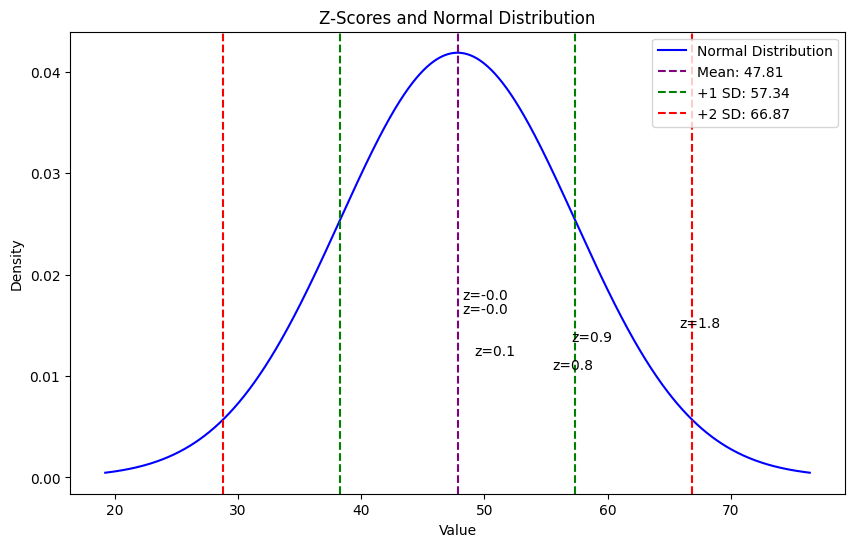

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Normal Distribution', color='blue')
plt.axvline(mean, color='purple', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(mean + std_dev, color='green', linestyle='--', label=f'+1 SD: {mean + std_dev:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='--')
plt.axvline(mean + 2*std_dev, color='red', linestyle='--', label=f'+2 SD: {mean + 2*std_dev:.2f}')
plt.axvline(mean - 2*std_dev, color='red', linestyle='--')
for i in range(6):   # Annotate a few z-scores
    plt.annotate(f'z={z_scores[i]:.1f}', (data[i], 0.01), textcoords="offset points", xytext=(5,5+i*10))
plt.title('Z-Scores and Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

## t-Score

In [13]:
sample_scores = np.array([78, 82, 85, 88, 90])
sample_mean = np.mean(sample_scores)
sample_std_dev = np.std(sample_scores, ddof=1)  
n = len(sample_scores)

In [14]:
t_score = (sample_scores - sample_mean) / (sample_std_dev / np.sqrt(n))
t_score.round(2)

array([-3.09, -1.22,  0.19,  1.59,  2.53])

### Application 1: Estimating the Average Height of High School Students

In [15]:
import scipy.stats as st
import numpy as np
sample_mean = 170  # cm
sample_std = 8  # cm
n = 50  # sample size
confidence_level = 0.95
t_critical = st.t.ppf((1 + confidence_level) / 2, df=n-1)
margin_of_error = t_critical * (sample_std / np.sqrt(n))
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

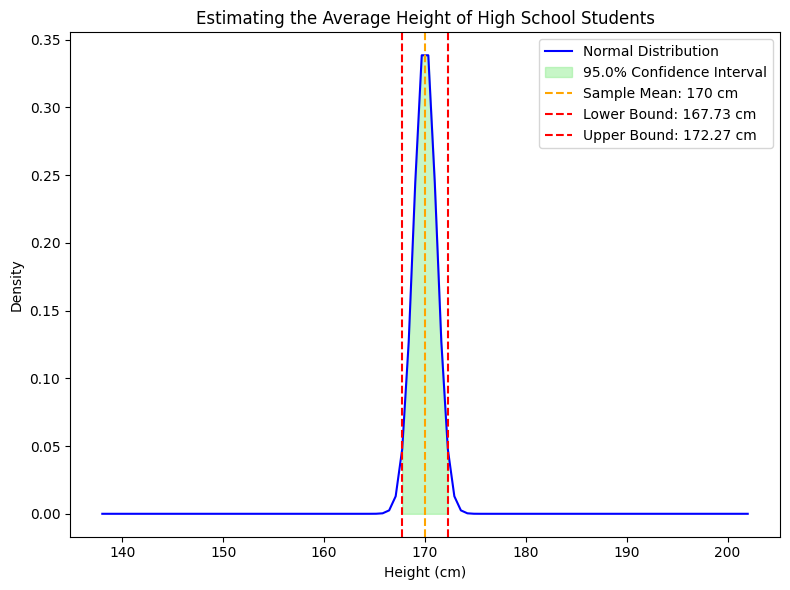

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
x = np.linspace(sample_mean - 4 * sample_std, sample_mean + 4 * sample_std, 100)
y = st.norm.pdf(x, sample_mean, sample_std / np.sqrt(n))
ax.plot(x, y, label='Normal Distribution', color='blue')
ax.fill_between(x, y, where=(x >= lower_bound) & (x <= upper_bound), color='lightgreen', alpha=0.5, label=f'{confidence_level*100}% Confidence Interval')
ax.axvline(sample_mean, color='orange', linestyle='--', label=f'Sample Mean: {sample_mean} cm')
ax.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f} cm')
ax.axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound: {upper_bound:.2f} cm')
ax.set_xlabel('Height (cm)')
ax.set_ylabel('Density')
ax.set_title('Estimating the Average Height of High School Students')
ax.legend()
plt.tight_layout()
plt.show()

### Application 2: Estimating the Proportion of People Who Like Pizza

In [17]:
sample_proportion = 90 / 120  # 0.75
n = 120  # sample size
confidence_level = 0.90
z_critical = st.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_critical * np.sqrt((sample_proportion * (1 - sample_proportion)) / n)
lower_bound = sample_proportion - margin_of_error
upper_bound = sample_proportion + margin_of_error
(lower_bound, upper_bound)

(np.float64(0.6849814515155553), np.float64(0.8150185484844447))

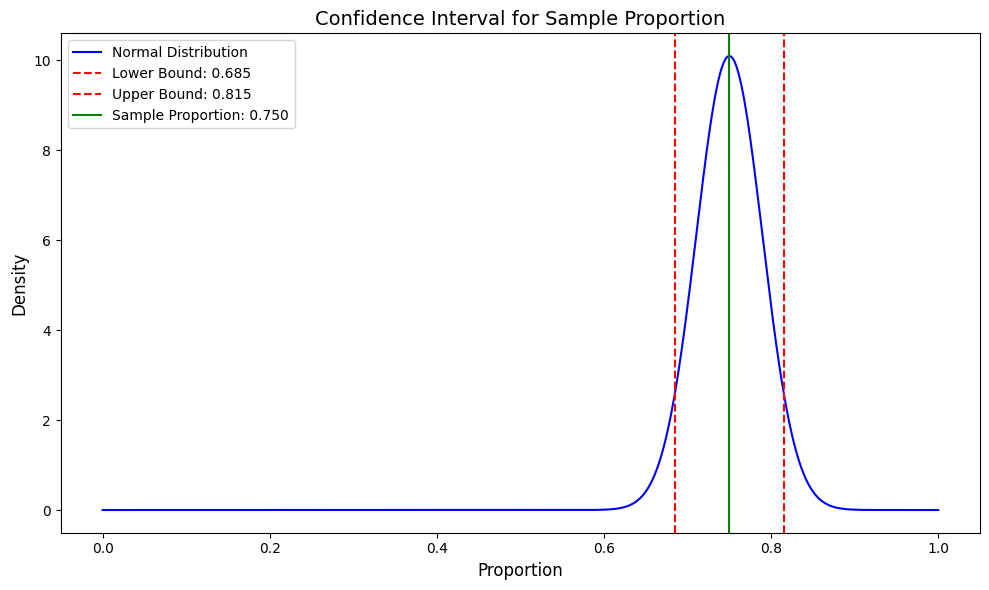

In [18]:
plt.figure(figsize=(10, 6))
x = np.linspace(0, 1, 1000)
y = st.norm.pdf(x, sample_proportion, np.sqrt((sample_proportion * (1 - sample_proportion)) / n))
plt.plot(x, y, label='Normal Distribution', color='blue')
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.3f}')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound: {upper_bound:.3f}')
plt.axvline(sample_proportion, color='green', linestyle='-', label=f'Sample Proportion: {sample_proportion:.3f}')
plt.title('Confidence Interval for Sample Proportion', fontsize=14)
plt.xlabel('Proportion', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### Application 3: Z-Score

In [19]:
mean = 75
std_dev = 10
sarah_score = 90
z_score = (sarah_score - mean) / std_dev
print(f"Sarah's Z-score is: {z_score}")

Sarah's Z-score is: 1.5


### Application 4: T-Score

In [20]:
import math
mean_score = 82
std_dev_bio = 5
emily_score = 90
n_students = 15
standard_error = std_dev_bio / math.sqrt(n_students)
t_score = (emily_score - mean_score) / standard_error
print(f"Emily's T-score is: {t_score:.2f}")

Emily's T-score is: 6.20


### Example: Estimating the Average Height of Adults in a City Using Random Sampling

In [21]:
Z = 1.96  # Z-score for 95\% confidence level
sigma = 7.5  # Population standard deviation in cm
E = 2  # Desired margin of error in cm
N = 100000  # Total population size
n = (Z**2 * sigma**2) / E**2  
n = round(n) # Round up the result 
  # Adjust for Finite Population (FPC)
n_adj = n / (1 + (n - 1) / N)
n_adj = round(n_adj) # Round the adjusted sample size
print(f"Required sample size (n) without FPC: {n}")
print(f"Adjusted sample size (n_adj) with FPC: {n_adj}")

Required sample size (n) without FPC: 54
Adjusted sample size (n_adj) with FPC: 54


### Example: Estimating the Average Income in a City Using Stratified Sampling

In [22]:
import math
Z = 1.96  # Z-score for 95\% confidence level
E = 500   # Desired margin of error in USD
sigma_L = 8000  # Standard deviation for low-income stratum
sigma_M = 6000  # Standard deviation for middle-income stratum
sigma_H = 10000  # Standard deviation for high-income stratum
  # Calculate sample size for each stratum 
def calculate_sample_size(Z, sigma, E):
    return (Z**2 * sigma**2) / (E**2)

n_L = calculate_sample_size(Z, sigma_L, E)
n_M = calculate_sample_size(Z, sigma_M, E)
n_H = calculate_sample_size(Z, sigma_H, E)
  # Round up to the nearest whole number for each stratum's sample size
n_L = math.ceil(n_L)
n_M = math.ceil(n_M)
n_H = math.ceil(n_H)
  # Calculate total sample size
n_total = n_L + n_M + n_H
  # Define population sizes for each stratum
N_L = 40000  # Low-income population
N_M = 30000  # Middle-income population
N_H = 30000  # High-income population
N_total = 100000  # Total population

In [23]:
n_L_alloc = (N_L / N_total) * n_total
n_M_alloc = (N_M / N_total) * n_total
n_H_alloc = (N_H / N_total) * n_total
  # Round up to the nearest whole number for proportional allocation
n_L_alloc = math.ceil(n_L_alloc)
n_M_alloc = math.ceil(n_M_alloc)
n_H_alloc = math.ceil(n_H_alloc)

In [24]:
print(f"Sample size for Low-income stratum: {n_L}")
print(f"Sample size for Middle-income stratum: {n_M}")
print(f"Sample size for High-income stratum: {n_H}")
print(f"Total sample size: {n_total}")
print("\nProportional allocation:")
print(f"Proportional sample size for Low-income stratum: {n_L_alloc}")
print(f"Proportional sample size for Middle-income stratum: {n_M_alloc}")
print(f"Proportional sample size for High-income stratum: {n_H_alloc}")

Sample size for Low-income stratum: 984
Sample size for Middle-income stratum: 554
Sample size for High-income stratum: 1537
Total sample size: 3075

Proportional allocation:
Proportional sample size for Low-income stratum: 1230
Proportional sample size for Middle-income stratum: 923
Proportional sample size for High-income stratum: 923


### Example: Estimating the Proportion of Voters Who Support a Specific Candidate Using Simple Random Sampling (SRS)

In [25]:
import math
Z = 1.96  # Z-score for 95\% confidence level
p = 0.55  # Estimated proportion
E = 0.02  # Desired margin of error
N = 200000  # Total population
  # Step 1: Apply the formula for sample size calculation (without finite population correction)
n = (Z**2 * p * (1 - p)) / (E**2)
  # Step 2: Adjust for finite population correction (FPC)
n_adj = n / (1 + (n - 1) / N)
print(f"Sample size required without finite population correction: {n:.2f}")
print(f"Adjusted sample size with finite population correction: {math.ceil(n_adj)}")


Sample size required without finite population correction: 2376.99
Adjusted sample size with finite population correction: 2350


### Example: Estimating the Proportion of Voters Who Support a Specific Candidate Using Stratified Sampling

In [26]:
import math
Z = 1.96  # Z-score for 95\% confidence
E = 0.02  # Desired margin of error
population_total = 200000  
region_populations = {'Central': 100000, 'East': 50000, 'West': 50000}  
proportions = {'Central': 0.55, 'East': 0.60, 'West': 0.50}  
def sample_size(Z, p, E):
    return (Z**2 * p * (1 - p)) / (E**2)
  
  # Step 1: Calculate sample size for each region
sample_sizes = {region: sample_size(Z, p, E) for region, p in proportions.items()}
  # Step 2: Compute the total sample size
total_sample_size = sum(sample_sizes.values())
  # Step 3: Proportional allocation for each region
allocated_sample_sizes = {region: (region_population / population_total) * total_sample_size for region, region_population in region_populations.items()}
print("Sample sizes for each region (before rounding):")
for region, size in sample_sizes.items():
    print(f"{region}: {size:.2f}")   
print("\nTotal sample size (before rounding):")
print(f"Total sample size: {total_sample_size:.2f}")
print("\nProportional allocation (rounded to nearest whole number):")
for region, allocated_size in allocated_sample_sizes.items():
    print(f"{region}: {math.ceil(allocated_size)}")

Sample sizes for each region (before rounding):
Central: 2376.99
East: 2304.96
West: 2401.00

Total sample size (before rounding):
Total sample size: 7082.95

Proportional allocation (rounded to nearest whole number):
Central: 3542
East: 1771
West: 1771


In [27]:
import math
Z = 1.96  # Z-score for 95\% confidence
E = 0.02  # Desired margin of error
population_total = 200000  
region_populations = {'Central': 100000, 'East': 50000, 'West': 50000}  
proportions = {'Central': 0.55, 'East': 0.60, 'West': 0.50}  
def sample_size(Z, p, E):
    return (Z**2 * p * (1 - p)) / (E**2)
  
  # Step 1: Calculate sample size for each region
sample_sizes = {region: sample_size(Z, p, E) for region, p in proportions.items()}
  # Step 2: Compute the total sample size
total_sample_size = sum(sample_sizes.values())
  # Step 3: Proportional allocation for each region
allocated_sample_sizes = {region: (region_population / population_total) * total_sample_size for region, region_population in region_populations.items()}
print("Sample sizes for each region (before rounding):")
for region, size in sample_sizes.items():
    print(f"{region}: {size:.2f}")   
print("\nTotal sample size (before rounding):")
print(f"Total sample size: {total_sample_size:.2f}")
print("\nProportional allocation (rounded to nearest whole number):")
for region, allocated_size in allocated_sample_sizes.items():
    print(f"{region}: {math.ceil(allocated_size)}")


Sample sizes for each region (before rounding):
Central: 2376.99
East: 2304.96
West: 2401.00

Total sample size (before rounding):
Total sample size: 7082.95

Proportional allocation (rounded to nearest whole number):
Central: 3542
East: 1771
West: 1771
